# Uncovering Trends and Opportunities in the Indian Startup Ecosystem: A Python-Based Approach.


# Description


In this project, Python is used to analyze and visualize industry data and 
identify key trends and opportunities in the Indian startup market. 
The analysis will cover funding trends, the geographic distribution of 
the start-ups,funding sources, and the industrial sector in which the start-ups operate. 
The insights gained from this project will help venture capitalists 
stay ahead of the curve and identify promising investment opportunities.


# Questions


1-What is the funding trend in the Indian start-up ecosystem over the past few years?

2-Which sectors have received the most funding year on year?

3-Who are the top investors and what initiatives do they typically invest in?

4-Where are the start-ups located and in what industries?

5-Which location has attracted the most funding?


# Hypothesis

Hypothesis:
The location of a start-up has an impact on the amount of funding it is able to secure.

Null hypothesis:
The location of a start-up has no significant influence on the amount of funding it raises.

Alternate hypothesis:
The location of a start-up significantly influences the amount of funding it raises.


# INSTALLATION

In [11]:
pip install jupyter-summarytools

# IMPORTING LIBRARIES

In [12]:
# libraries to use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from summarytools import dfSummary
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')
# show floats to only 4 deicmal places
pd.set_option('display.float_format', lambda x: '%0.4f' % x)


# LOADING DATA 

NB:The columns loaded were restricted to only the ones that will enable us answer the questions posed above.

In [13]:
su_18=pd.read_csv('C:/Users/donto/Desktop/India/startup_funding2018.csv', usecols=['Company Name','Location','Industry','Amount','Round/Series'])
su_19=pd.read_csv('C:/Users/donto/Desktop/India/startup_funding2019.csv', usecols=['Company/Brand','HeadQuarter','Sector','Investor','Amount($)','Stage'])
su_20=pd.read_csv('C:/Users/donto/Desktop/India/startup_funding2020.csv',usecols=['Company/Brand','HeadQuarter','Sector','Investor','Amount($)','Stage'])
su_21=pd.read_csv('C:/Users/donto/Desktop/India/startup_funding2021.csv', usecols=['Company/Brand','HeadQuarter','Sector','Investor','Amount($)','Stage'])

# EXPLORATORY DATA ANALYSIS:EDA

Here we inspect the datasets in depth year by year and column by column. This is to clean and process it.

<b>2018 Dataset inspection and cleaning<b>

In [14]:
su_18.head()

,Company Name,Industry,Round/Series,Amount,Location
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India"
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India"
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India"
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India"
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India"


<b>First create a column in the datasets to represent the year represented by that particular dataset.<b>

In [15]:
su_18['Year']='2018'
su_19['Year']='2019'
su_20['Year']='2020'
su_21['Year']='2021'


In [16]:
dfSummary(su_18, is_collapsible = True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Company Name[object],1. TheCollegeFever2. NIRAMAI Health Analytix3. Drivezy4. Hush - Speak Up. Make Work Bet5. The Souled Store6. Perspectico7. Kogta Financial India Limited8. Hospals9. UrbanClap10. Square Off11. other,2 (0.4%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)515 (97.9%),,0(0.0%)
2,Industry[object],"1. —2. Financial Services3. Education4. Information Technology5. Health Care, Hospital6. Finance, Financial Services7. Fitness, Health Care, Wellness8. Internet9. Artificial Intelligence10. Health Care11. other",30 (5.7%)15 (2.9%)8 (1.5%)7 (1.3%)5 (1.0%)5 (1.0%)4 (0.8%)4 (0.8%)4 (0.8%)4 (0.8%)440 (83.7%),,0(0.0%)
3,Round/Series[object],1. Seed2. Series A3. Angel4. Venture - Series Unknown5. Series B6. Series C7. Debt Financing8. Private Equity9. Corporate Round10. Pre-Seed11. other,280 (53.2%)73 (13.9%)37 (7.0%)37 (7.0%)20 (3.8%)16 (3.0%)13 (2.5%)10 (1.9%)8 (1.5%)6 (1.1%)26 (4.9%),,0(0.0%)
4,Amount[object],"1. —2. 10000003. 5000004. 20000005. ₹50,000,0006. ₹20,000,0007. 40000008. 50000009. 25000010. ₹40,000,00011. other",148 (28.1%)24 (4.6%)13 (2.5%)12 (2.3%)9 (1.7%)8 (1.5%)7 (1.3%)7 (1.3%)6 (1.1%)6 (1.1%)286 (54.4%),,0(0.0%)
5,Location[object],"1. Bangalore, Karnataka, India2. Mumbai, Maharashtra, India3. Bengaluru, Karnataka, India4. Gurgaon, Haryana, India5. New Delhi, Delhi, India6. Pune, Maharashtra, India7. Chennai, Tamil Nadu, India8. Hyderabad, Andhra Pradesh, Ind9. Delhi, Delhi, India10. Noida, Uttar Pradesh, India11. other",102 (19.4%)94 (17.9%)55 (10.5%)52 (9.9%)51 (9.7%)20 (3.8%)19 (3.6%)18 (3.4%)16 (3.0%)15 (2.9%)84 (16.0%),,0(0.0%)
6,Year[object],1. 2018,526 (100.0%),,0(0.0%)


<b>Specific issues identified with the 2018 datasets<b>
    
-The location column lists the city, state and country name. This would have to be stripped to only the city name.
    
-2018 dataset does not have a column for investors, this will have to created to aid the analysis.
    
-Names of some of the columns has to be changed for it to be consistent with those of 2019,2020 and 2021.


<b>NB:THE SPECIFIC ISSUES PERTAINING TO 2018 DATASET IS DEALT WITH BEFORE IT IS INTEGRATED WITH THE OTHER DATASET FOR HOLISTIC INSPECTION AND CLEANING.<b>

In [17]:
#harmonizing the 2018 dataset columns to match the other three datasets
su_18.columns=['Company/Brand','Sector','Stage','Amount($)','HeadQuarter','Year']

su_18.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",2018


SECTOR COLUMN

<b>Here the aim is to retain only the first description as shown in the sector column as its own column then drop the rest.<b>

In [18]:
df_18=su_18['Sector'].str.split(pat=',', n=1, expand=True)
su_18['industry1']=df_18[0]

su_18

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Year,industry1
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India",2018,Brand Marketing
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",2018,Agriculture
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",2018,Credit
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",2018,Financial Services
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",2018,E-Commerce Platforms
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India",2018,B2B
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",2018,Tourism
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",2018,Food and Beverage
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",2018,Information Technology


In [19]:
su_18.drop('Sector', axis=1, inplace=True)


In [20]:
su_18=su_18.rename(columns={'industry1':'Sector'})
su_18

,Company/Brand,Stage,Amount($),HeadQuarter,Year,Sector
0,TheCollegeFever,Seed,250000,"Bangalore, Karnataka, India",2018,Brand Marketing
1,Happy Cow Dairy,Seed,"₹40,000,000","Mumbai, Maharashtra, India",2018,Agriculture
2,MyLoanCare,Series A,"₹65,000,000","Gurgaon, Haryana, India",2018,Credit
3,PayMe India,Angel,2000000,"Noida, Uttar Pradesh, India",2018,Financial Services
4,Eunimart,Seed,—,"Hyderabad, Andhra Pradesh, India",2018,E-Commerce Platforms
...,...,...,...,...,...,...
521,Udaan,Series C,225000000,"Bangalore, Karnataka, India",2018,B2B
522,Happyeasygo Group,Series A,—,"Haryana, Haryana, India",2018,Tourism
523,Mombay,Seed,7500,"Mumbai, Maharashtra, India",2018,Food and Beverage
524,Droni Tech,Seed,"₹35,000,000","Mumbai, Maharashtra, India",2018,Information Technology


HEADQUARTER COLUMN

<b>The aim is to strip the city name from the string under the HeadQuarter<b>

In [21]:
su18=su_18['HeadQuarter'].str.split(pat=',', n=1, expand=True)
su_18['location']=su18[0]

su_18

,Company/Brand,Stage,Amount($),HeadQuarter,Year,Sector,location
0,TheCollegeFever,Seed,250000,"Bangalore, Karnataka, India",2018,Brand Marketing,Bangalore
1,Happy Cow Dairy,Seed,"₹40,000,000","Mumbai, Maharashtra, India",2018,Agriculture,Mumbai
2,MyLoanCare,Series A,"₹65,000,000","Gurgaon, Haryana, India",2018,Credit,Gurgaon
3,PayMe India,Angel,2000000,"Noida, Uttar Pradesh, India",2018,Financial Services,Noida
4,Eunimart,Seed,—,"Hyderabad, Andhra Pradesh, India",2018,E-Commerce Platforms,Hyderabad
...,...,...,...,...,...,...,...
521,Udaan,Series C,225000000,"Bangalore, Karnataka, India",2018,B2B,Bangalore
522,Happyeasygo Group,Series A,—,"Haryana, Haryana, India",2018,Tourism,Haryana
523,Mombay,Seed,7500,"Mumbai, Maharashtra, India",2018,Food and Beverage,Mumbai
524,Droni Tech,Seed,"₹35,000,000","Mumbai, Maharashtra, India",2018,Information Technology,Mumbai


In [22]:
su_18.drop('HeadQuarter', axis=1, inplace=True)
su_18

,Company/Brand,Stage,Amount($),Year,Sector,location
0,TheCollegeFever,Seed,250000,2018,Brand Marketing,Bangalore
1,Happy Cow Dairy,Seed,"₹40,000,000",2018,Agriculture,Mumbai
2,MyLoanCare,Series A,"₹65,000,000",2018,Credit,Gurgaon
3,PayMe India,Angel,2000000,2018,Financial Services,Noida
4,Eunimart,Seed,—,2018,E-Commerce Platforms,Hyderabad
...,...,...,...,...,...,...
521,Udaan,Series C,225000000,2018,B2B,Bangalore
522,Happyeasygo Group,Series A,—,2018,Tourism,Haryana
523,Mombay,Seed,7500,2018,Food and Beverage,Mumbai
524,Droni Tech,Seed,"₹35,000,000",2018,Information Technology,Mumbai


In [23]:
su_18=su_18.rename(columns={'location':'HeadQuarter'})

# MERGING THE FOUR DATASETS

NB:The four datasets have been combined into a single dataFrame called df_startup. The individual columns in this new DataFrame will be inspected and cleaned. Only six relevant columns are in this new DataFrame, they are Company/Brand,Stage,Amount,Sector,Headquarter and Investor.

In [24]:
df_startup=pd.concat([su_18,su_19,su_20,su_21],ignore_index=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [25]:
df_startup.head()

,Company/Brand,Stage,Amount($),Year,Sector,HeadQuarter,Investor
0,TheCollegeFever,Seed,250000,2018,Brand Marketing,Bangalore,NaN
1,Happy Cow Dairy,Seed,"₹40,000,000",2018,Agriculture,Mumbai,NaN
2,MyLoanCare,Series A,"₹65,000,000",2018,Credit,Gurgaon,NaN
3,PayMe India,Angel,2000000,2018,Financial Services,Noida,NaN
4,Eunimart,Seed,—,2018,E-Commerce Platforms,Hyderabad,NaN


<b>Inspecting the new dataframe<b>

In [26]:
df_startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2879 non-null   object
 1   Stage          1941 non-null   object
 2   Amount($)      2873 non-null   object
 3   Year           2879 non-null   object
 4   Sector         2861 non-null   object
 5   HeadQuarter    2765 non-null   object
 6   Investor       2253 non-null   object
dtypes: object(7)
memory usage: 157.6+ KB


<b>ISSUES IDENTIFIED WITH THE NEW DATAFRAME THAT NEEDS TO BE ADDRESSED<b>

-The new DataFrame df_startup has 25 duplicate entries.

-The Amount column is presented in an object datatype this has to be transformed into a float.

-The Amount column is represented in Indian Rupees, US dollars, figures with no designated currency symbol. This has to be hamonized.

-In the Stage column some of the stages are spelt slighty differently, these need to be harmonised to a single spelling.

-Some of the HeadQuarter names are a combination of city,state and country names. These have to be stripped leaving only the city name.

-In the Sector column, same sectors are spelt differently for different companies.


<b>CHECK FOR DUPLICATE ENTRIES IN THE NEW DATASET df_startup<b>

In [27]:
#CHECKING FOR THE DUPLICATES

df_startup.duplicated().value_counts()

False    2854
True       25
dtype: int64

In [28]:
#DROP THE DUPLICATES ENTRIES WHILST MAINTAINING THE INTEGRITY OF THE ORIGINAL DATAFRAME

df_startup.drop_duplicates(keep='first', inplace=True)

In [29]:
#CONFIRM THERE ARE NO DUPLICATE ENTRIES IN THE DATAFRAME df_startup

df_startup.duplicated().value_counts()

False    2854
dtype: int64

<b>STAGE COLUMN.<b>

<b>Harmonising the column entries.<b>

In [30]:
df_startup.replace(to_replace=['Seed round','Seed funding','Early seed','Seed fund','Seed Investment','Seed Round','Seed+'], value='Seed', inplace=True)
df_startup.replace(to_replace=['Debt Financing'], value='Debt', inplace=True)
df_startup.replace(to_replace=['Venture - Series Unknown'], value='Undisclosed', inplace=True)
df_startup.replace(to_replace=['Angel Round'], value='Angel', inplace=True)
df_startup.replace(to_replace=['Pre-Series B','Pre-series B'], value='Pre series B', inplace=True)
df_startup.replace(to_replace=['Pre-seed'], value='Pre Seed', inplace=True)
df_startup.replace(to_replace=['Seis A'], value='Series A', inplace=True)

<b>Drop the Rows that are not fit for purpose.<b>

In [31]:
df_startup.drop([178,1768,2208,2221,2244,2247], inplace=True)

<b>We replace NaN in the Stage Column with Undisclosed.<b>

In [32]:
df_startup.Stage.fillna('Undisclosed', inplace=True)


<b>SECTOR COLUMN<b>

<b>Harmonise the sectors to make them consistent. Some sectors were spelt slightly differently, which implied they will be grouped differently.<b>

In [33]:
df_startup.replace(to_replace=['Fintech'], value='FinTech', inplace=True)
df_startup.replace(to_replace=['EdTech Startup','Edtech','EdtTech'], value='EdTech', inplace=True)
df_startup.replace(to_replace=['Insurance','Banking','Credit','Consumer Lending','Accounting','Finance company','Finance','Capital Markets','Venture Capital & Private Equity','Venture capital',], value='Financial Services', inplace=True)
df_startup.replace(to_replace=['E-Commerce','Ecommerce','Social e-commerce','E-marketplace'], value='E-commerce', inplace=True)
df_startup.replace(to_replace=['Automotive & Rentals','Automobiles'], value='Automotive', inplace=True)
df_startup.replace(to_replace=['Agritech','B2B Agritech'], value='AgriTech', inplace=True)
df_startup.replace(to_replace=['Food and Beverage','Beverages','Beverage'], value='Food & Beverages', inplace=True)
df_startup.replace(to_replace=['Logistics & Supply Chain'], value='Logistics', inplace=True)
df_startup.replace(to_replace=['Information Technology & Services','Tech','Internet','IT'], value='Information Technology', inplace=True)
df_startup.replace(to_replace=['Gaming startup','Computer Games'], value='Gaming', inplace=True)
df_startup.replace(to_replace=['HealthCare','Health Care','Health,Wellness & Fitness','Fitness','Hospital & Health Care','Health','Fitness startup','Health Care','Yoga & wellness','Health & Wellness','Helath care','Healthcare','Health Diagnostics','Heathcare'], value='Healthcare', inplace=True)
df_startup.replace(to_replace=['HealthTech'], value='Healthtech', inplace=True)
df_startup.replace(to_replace=['SaaS startup','SaaS platform'], value='SaaS', inplace=True)
df_startup.replace(to_replace=['FMCG'], value='Consumer Goods', inplace=True)
df_startup.replace(to_replace=['Online Media'], value='Media', inplace=True)
df_startup.replace(to_replace=['Retail startup','Consumer'], value='Retail', inplace=True)
df_startup.replace(to_replace=['Apps','Tech Company','Technology','Information Services','Tech startup'], value='Tech Startup', inplace=True)
df_startup.replace(to_replace=['AI','Artificial Intelligence','AI Company','AI startup'], value='AI Startup', inplace=True)
df_startup.replace(to_replace=['Computer softwre','Software','Computer','Software Startup','Software Startup'], value='Computer Software', inplace=True)
df_startup.replace(to_replace=['Apparel & Fashion','Fashion startup'], value='Fashion', inplace=True)
df_startup.replace(to_replace=['B2B Service','B2B marketplace','B2B Ecommerce','B2B E-commerce','B2B startup','B2B service'], value='B2B', inplace=True)
df_startup.replace(to_replace=['Food','Foodtech','Food tech'], value='FoodTech', inplace=True)
df_startup.replace(to_replace=['Internet of Things'], value='IoT', inplace=True)
df_startup.replace(to_replace=['Farming'], value='Agriculture', inplace=True)
df_startup.replace(to_replace=['Deeptech'], value='DeepTech', inplace=True)
df_startup.replace(to_replace=['Insuretech','Insurance technology'], value='InsureTech', inplace=True)
df_startup.replace(to_replace=['Rental space'], value='Rental', inplace=True)
df_startup.replace(to_replace=['Food Delivery','Delivery Service'], value='Delivery', inplace=True)
df_startup.replace(to_replace=['Marketing & Advertising','Brand Marketing','Market Research','Marketing startup'], value='Marketing', inplace=True)
df_startup.replace(to_replace=['Biotechnology'], value='BioTechnology', inplace=True)
df_startup.replace(to_replace=['Cleantech'], value='CleanTech', inplace=True)
df_startup.replace(to_replace=['Crypto'], value='Cryptocurrency', inplace=True)
df_startup.replace(to_replace=['Interior design'], value='Interior Design', inplace=True)

<b>HEADQUARTER COLUMN<b>

<b>Issues with the HeadQuarter Column<b>
    
-Names of the same locations are spelt differently.
    
-Some locations listed are outside India.
    
-Some of the locations listed are States in India instead of cities which are relevant for the analysis.
    
-Some locations are districts of already listed cities.

<b>Replacing the names of the HeadQuarter with the right ones.<b>

In [34]:
df_startup.replace(to_replace=['Bangalore City','Bangalore'], value='Bengaluru', inplace=True)
df_startup.replace(to_replace=['New Delhi','Azadpor'], value='Delhi', inplace=True)
df_startup.replace(to_replace=['Ahmadabad'], value='Ahmedabad', inplace=True)
df_startup.replace(to_replace=['Kochi'], value='Cochin', inplace=True)
df_startup.replace(to_replace=['Kormangala'], value='Koramangala', inplace=True)
df_startup.replace(to_replace=['Jaipur, Rajastan'], value='Jaipur', inplace=True)
df_startup.replace(to_replace=['Faridabad, Haryana'], value='Faridabad', inplace=True)
df_startup.replace(to_replace=['Powai','Worli'], value='Mumbai', inplace=True)
df_startup.replace(to_replace=['Small Towns, Andhra Pradesh'], value='Andhra Pradesh', inplace=True)
df_startup.replace(to_replace=['Hyderebad'], value='Hyderabad', inplace=True)
df_startup.replace(to_replace=['Gurugram\t#REF!'], value='Gurugram', inplace=True)
df_startup.replace(to_replace=['Orissia'], value='Orissa', inplace=True)
df_startup.replace(to_replace=['Samstipur','Samastipur, Bihar','Samsitpur'], value='Samastipur', inplace=True)
df_startup.replace(to_replace=['The Nilgiris'], value='Nilgiris', inplace=True)
df_startup.replace(to_replace=['Dhindsara, Haryana','Dhingsara, Haryana'], value='Dhingsara', inplace=True)
df_startup.replace(to_replace=['Tirunelveli, Tamilnadu'], value='Tirunelveli', inplace=True)
df_startup.replace(to_replace=['Mylapore'], value='Chennai', inplace=True)
df_startup.replace(to_replace=['Rajastan'], value='Rajasthan', inplace=True)
df_startup.replace(to_replace=['Trivandrum, Kerala, India'], value='Trivandrum', inplace=True)
df_startup.replace(to_replace=['Mangalore'], value='Mangaluru', inplace=True)
df_startup.replace(to_replace=['Tumkur, Karnataka'], value='Tumkur', inplace=True)

<b>Now we drop the HeadQuarter Entries that are not fit for the analysis<b>

In [35]:
df_startup.drop([42,59,706,781,791,801,838,840,844,845,847,855,860,875,876,877,879,880,888,889,894,902,907,915,916,918,921,932,984,988,999,1001,1003,1005,1006,1012,1014,1015,1035,1072,1073,1074,1098,1911,1912,2422,2571,2590,2770,2843,2846,854,1028,1071,1080,1087,1927,2215,2347,2807,2816,2818,2344], inplace=True)

<b>AMOUNT COLUMN<b>

<b>Harmonise entries<b>

In [36]:
df_startup.replace(to_replace=['$Undisclosed','$undisclosed'], value='Undisclosed', inplace=True)

<b>Remove the Rupee symbol and Convert all Rupee to US Dollars. <b>

In [37]:
#2018 Exchange rate Rupee to a Dollar.
exchange_rate = 68.14

def rupee_to_dollar(amount):
    if isinstance(amount, str) and amount.startswith('₹'):
        amount = float(amount.replace(',', '')[1:]) * exchange_rate
        return f'${amount:.2f}'
    else:
        return amount

# remove rupee sign and comma, and convert to dollar equivalent
df_startup['Amount($)'] = df_startup['Amount($)'].apply(lambda x: rupee_to_dollar(x))

In [38]:
df_startup['Amount($)'] = df_startup['Amount($)'].str.replace('$', '').str.replace(',', '').replace(['—', 'Undisclosed','Undiclosed','Undiclsosed','Undislosed'], np.nan).astype(float)

<b>Handling NaN entries in the Amount column using interpolate.<b>

In [39]:
#df_startup['Amount($)']=df_startup['Amount($)'].interpolate(method='Linear')
#df_startup['Amount($)']

df_startup.head()

,Company/Brand,Stage,Amount($),Year,Sector,HeadQuarter,Investor
0,TheCollegeFever,Seed,250000.0000,2018,Marketing,Bengaluru,NaN
1,Happy Cow Dairy,Seed,2725600000.0000,2018,Agriculture,Mumbai,NaN
2,MyLoanCare,Series A,4429100000.0000,2018,Financial Services,Gurgaon,NaN
3,PayMe India,Angel,2000000.0000,2018,Financial Services,Noida,NaN
4,Eunimart,Seed,NaN,2018,E-Commerce Platforms,Hyderabad,NaN


<b>YEAR COLUMN<b>

<b>Convert the year column to Datetime<b>

In [40]:
df_startup['Year']=pd.to_datetime(df_startup.Year)

In [41]:
# Convert the datetime column to year
df_startup['Year'] = df_startup['Year'].dt.year


<b>INVESTOR COLUMN<b>

<b>There is lots of NaN entries in this column. Majority of which is attributable to the 2018 dataset, which had no information on Investors.<b>

In [42]:
#We input undisclosed in place for NaN in the investor column.

df_startup.Investor.fillna('Undisclosed', inplace=True)

In [43]:
dfSummary(df_startup, is_collapsible = True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Company/Brand[object],1. BharatPe2. Zomato3. Spinny4. Trell5. Nykaa6. Zetwerk7. Vedantu8. Jumbotail9. Teachmint10. Slice11. other,"10 (0.4%)7 (0.3%)6 (0.2%)6 (0.2%)6 (0.2%)6 (0.2%)6 (0.2%)5 (0.2%)5 (0.2%)5 (0.2%)2,723 (97.8%)",,0(0.0%)
2,Stage[object],1. Undisclosed2. Seed3. Series A4. Pre-series A5. Series B6. Series C7. Pre series A8. Pre Seed9. Debt10. Series D11. other,938 (33.7%)672 (24.1%)300 (10.8%)207 (7.4%)130 (4.7%)109 (3.9%)62 (2.2%)58 (2.1%)55 (2.0%)50 (1.8%)204 (7.3%),,0(0.0%)
3,Amount($)[float64],Mean (sd) : 2696880469.0 (38964511037.3)min < med < max:9.6 < 4000000.0 < 1362800000000.0IQR (CV) : 19000000.0 (0.1),503 distinct values,,538(19.3%)
4,Year[int64],1. FinTech2. EdTech3. Financial Services4. Healthcare5. E-commerce6. Information Technology7. Food & Beverages8. AgriTech9. Healthtech10. Tech Startup11. other,"253 (9.1%)218 (7.8%)152 (5.5%)138 (5.0%)123 (4.4%)95 (3.4%)63 (2.3%)63 (2.3%)59 (2.1%)59 (2.1%)1,562 (56.1%)",,0(0.0%)
5,Sector[object],1. Bengaluru2. Mumbai3. Delhi4. Gurugram5. nan6. Chennai7. Pune8. Noida9. Gurgaon10. Hyderabad11. other,916 (32.9%)467 (16.8%)316 (11.3%)237 (8.5%)114 (4.1%)107 (3.8%)103 (3.7%)85 (3.1%)80 (2.9%)77 (2.8%)283 (10.2%),,18(0.6%)
6,HeadQuarter[object],1. Undisclosed2. Inflection Point Ventures3. Venture Catalysts4. Mumbai Angels Network5. Angel investors6. Tiger Global7. Titan Capital8. Unicorn India Ventures9. Better Capital10. Alteria Capital11. other,"629 (22.6%)34 (1.2%)32 (1.1%)17 (0.6%)15 (0.5%)12 (0.4%)11 (0.4%)10 (0.4%)9 (0.3%)9 (0.3%)2,007 (72.1%)",,114(4.1%)
7,Investor[object],nan,nan,nan,0(0.0%)


In [44]:
pip install xlwt


     ------------------------------------ 100.0/100.0 kB 337.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
#Save the newly created DataFrame as a csv file

df_startup.to_csv('df_startup.csv', encoding='utf-8')

In [46]:
#Save the newly created DataFrame as an excel file
df_startup.to_excel('df_startup.xls', encoding='utf-8')

# UNIVARIATE ANALYSIS

In [47]:
df_startup['Amount($)'].describe()

count            2247.0000
mean       2696880468.9572
std       38964511037.3328
min                 9.6000
25%           1000000.0000
50%           4000000.0000
75%          20000000.0000
max     1362800000000.0000
Name: Amount($), dtype: float64

# ANALYSIS-ANSWERING THE QUESTIONS AS PUT TO THE DATA

<b>Q1:What is the funding trend in the Indian start-up ecosystem over the past few years?<b>
    
The purpose of this question is to understand the trend in funding patterns from 2018 to 2021 in the Startup Ecosystem. Is the trend increasing,decreasing or stagnating?
 

In [48]:
funding_by_year = df_startup.groupby('Year')['Amount($)'].sum().apply(lambda x: '${:,.2f}'.format(x))
df_funding_by_year = pd.DataFrame({'Year': funding_by_year.index, 'Amount($)': funding_by_year.values})
df_funding_by_year['Amount($)'] = df_funding_by_year['Amount($)'].apply(lambda x: float(x.replace(',', '').replace('$', '')))

df_funding_by_year

,Year,Amount($)
0,2018,5791841118891.0000
1,2019,3336433200.0000
2,2020,85627796655.8300
3,2021,179085065000.0000


<b>Visualization <b>

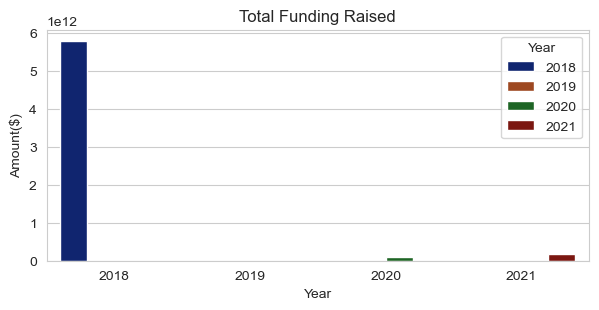

In [49]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(7, 3))
plt.title('Total Funding Raised')
sns.barplot(x='Year', y='Amount($)', palette='dark', data=df_funding_by_year, hue='Year')
plt.show()

2018 was a really good year for startups in India, as they attracted their highest investment to date. The 25th Oct, 2018 edition of the Economic Times online magazine indicated a 108% increase in startup funding in India. After 2018, the flow of investment slumped drastically, further analysis is required to understand what happened from 2019 to 2021.

<b>Q2:-Which sectors have received the most funding year on year?<b>
    
This question seeks to understand the distribution of funding by sector inside a given year. There are a plethora of sectors in the startup ecosystem, we want to understand which industries are receiving the most funding.

In [50]:
funding_by_year_sector = df_startup.groupby(['Year','Sector'])['Amount($)'].sum()

funding_by_year_sector = funding_by_year_sector.groupby('Year').idxmax()

for year, sector in funding_by_year_sector.items():
   print(f"{year}: {sector[1]}")

2018: Financial Services
2019: EdTech
2020: Retail
2021: FinTech


<b>Q3:Who are the top investors and what Sectors do they typically invest in?<b>
    
As investors ourselves, we want to understand who are the top players on the scene. We also seek to understand 
the sectors they invest in, this will help us decide which sectors to either invest in or not.

In [51]:
#Create a subset DataFrame to filter out Investor entries designated as Undisclosed

df_investor=df_startup[~df_startup.Investor.str.contains('Undisclosed')]

df_investor.head()

,Company/Brand,Stage,Amount($),Year,Sector,HeadQuarter,Investor
526,Bombay Shaving,Undisclosed,6300000.0000,2019,E-commerce,NaN,Sixth Sense Ventures
527,Ruangguru,Series C,150000000.0000,2019,EdTech,Mumbai,General Atlantic
528,Eduisfun,Fresh funding,28000000.0000,2019,EdTech,Mumbai,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey"
529,HomeLane,Series D,30000000.0000,2019,Interior Design,Chennai,"Evolvence India Fund (EIF), Pidilite Group, FJ..."
530,Nu Genes,Undisclosed,6000000.0000,2019,AgriTech,Telangana,Innovation in Food and Agriculture (IFA)


In [52]:
funding_by_investor = df_investor.groupby(['Investor','Sector'])['Amount($)'].sum().reset_index()
sorted_funding_by_investor = funding_by_investor.sort_values(by='Amount($)', ascending=False)
top_investors = sorted_funding_by_investor.head(5)

top_investors

,Investor,Sector,Amount($)
1555,"Silver Lake, Mubadala Investment Company",Retail,70000000000.0000
562,"Facebook, Google, KKR, Silver Lake",Multinational conglomerate company,2200000000.0000
404,"Canaan Valley Capital, Glade Brook Capital Par...",Innovation Management,1000000000.0000
569,"Falcon Edge, DST Global, D1 Capital, Redbird C...",Sports,840000000.0000
412,"Carmignac, Falcon Edge Capital",Food delivery,800000000.0000


<b>Visualization<b>

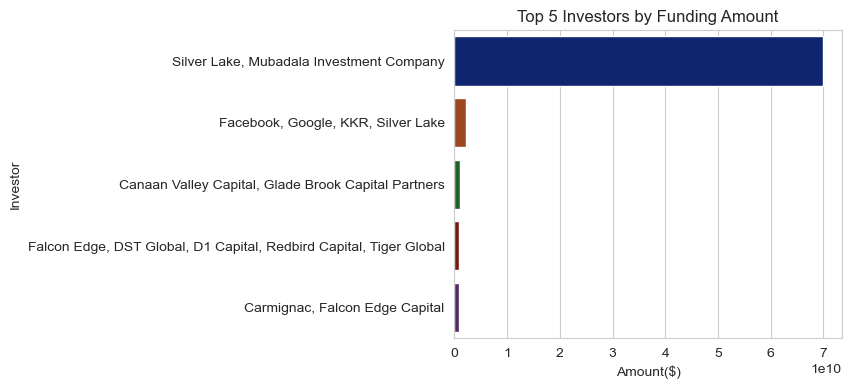

In [53]:
plt.figure(figsize=(5,4))
plt.title('Top 5 Investors by Funding Amount')
sns.set_style(style='whitegrid')
top_investors['Amount($)'] = pd.to_numeric(top_investors['Amount($)'])
sns.barplot(x='Amount($)',y='Investor', palette='dark', data=top_investors, orient='h')
plt.show()

<b>Q4:Where are the Startups located and In what sectors?<b>
    
This question seeks to understand where the startups are located and whether there is clustering effect among the startups. That is startups in similar or same industry setup close to one another to take advantage of skills or other kinds of resources required for that specific industry.

In [54]:
startup_location = df_startup.groupby(['HeadQuarter','Sector'])['Company/Brand'].count().reset_index(name='Number_of_firms')
startup_location = startup_location.sort_values(by='Number_of_firms', ascending=False).head(10)

startup_location

,HeadQuarter,Sector,Number_of_firms
141,Bengaluru,FinTech,78
130,Bengaluru,EdTech,77
142,Bengaluru,Financial Services,51
841,Mumbai,FinTech,48
160,Bengaluru,Healthcare,44
173,Bengaluru,Information Technology,36
830,Mumbai,EdTech,33
409,Delhi,FinTech,32
842,Mumbai,Financial Services,31
581,Gurugram,FinTech,27


<b>Visualization<b>

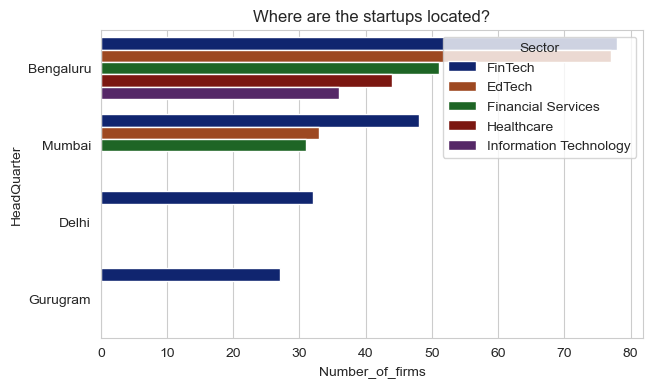

In [55]:
plt.figure(figsize=(7,4))
plt.title('Where are the startups located?')
sns.set_style(style='whitegrid')
sns.barplot(x='Number_of_firms',y='HeadQuarter', palette='dark', data=startup_location, orient='h', hue='Sector')
plt.show()

The Bengalaru has the highest number of startups in India by headline aggregate. Further drill down into the data indicates clustering effect-where firms in similar or same industries site close to one another. This pattern is noted in the concentration of FinTechs,EdTechs,Financial Services,Healtcare and Information Technology startups in the city. 
This is consistent with the image of Bengaluru as the 'Silicon Valley of India'. Top Indian technological organisations like Infosys, Wipro and HAL are all headquartered in the city.

<b>Q5:Which location has attracted the most funding?<b>

In [56]:
funds_by_location = df_startup.groupby(['HeadQuarter'])['Amount($)'].sum().reset_index(name='Total_Raised')
funds_by_location = funds_by_location.sort_values(by='Total_Raised', ascending=False).head(5)
funds_by_location['Total_Raised'] = funds_by_location['Total_Raised'].apply(lambda x: '${:,.2f}'.format(x))

funds_by_location

,HeadQuarter,Total_Raised
55,Mumbai,"$1,638,800,028,042.23"
33,Haryana,"$1,405,119,729,800.00"
20,Delhi,"$1,077,995,225,209.60"
10,Bengaluru,"$905,385,324,604.00"
38,Jaipur,"$381,403,875,000.00"


<b>Visualizing<b>

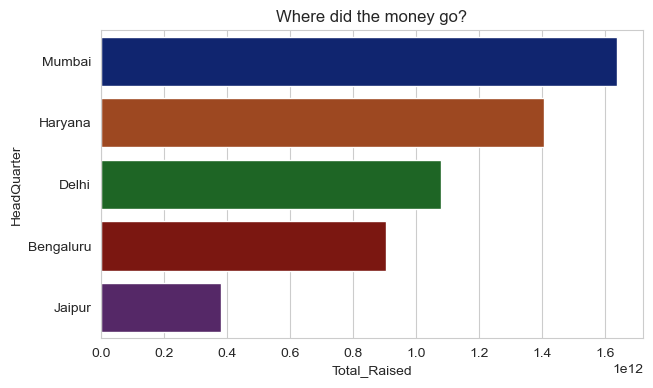

In [57]:
plt.figure(figsize=(7,4))
plt.title('Where did the money go?')
sns.set_style(style='whitegrid')
funds_by_location['Total_Raised'] = pd.to_numeric(funds_by_location['Total_Raised'].astype(str).str.replace('$', '').str.replace(',', ''))
sns.barplot(x='Total_Raised',y='HeadQuarter', palette='dark', data=funds_by_location, orient='h')
plt.show()

The top five destination for startup investment are Mumbai, Haryana, Delhi, Bengaluru and Jaipur. Mumbai which is the largest Indian city by population received the highest amount of investment, though it is second to Bengaluru interms number of startups it hosts. The data has to be further drilled down to identify the sectors the startsups that received the investment belong.

<b>TESTING THE HYPOTHESIS-ANOVA TEST<b>

In [58]:
df_startup = df_startup.dropna()

In [59]:
# get the unique values in the 'headquarter' column
headquarters = df_startup['HeadQuarter'].unique()

# create a list to store the data for each group
data = []

# loop over the unique values and get the data for each group
for hq in headquarters:
    data.append(df_startup.loc[df_startup['HeadQuarter'] == hq, 'Amount($)'])

# perform the ANOVA test
f_statistic, p_value = f_oneway(*data)

# print the results
print('F-statistic:', f_statistic)
print('p-value:', p_value)
if p_value < 0.05:
    print('There is a significant difference between the groups.')
else:
    print('There is no significant difference between the groups.')


F-statistic: 0.9288524308314621
p-value: 0.64452014230159
There is no significant difference between the groups.


<b>The hypothesis is rejected, that is the location of a startup has no influence on the amount of money it is able to raise.<b>

<b>LIMITATIONS OF THE DATA<b>

-The volume of data available for the analysis is not consistent across all years. This introduces a skewness into the data as some years have lot of data points than others.

-2018 dataset did not have an investor column, this affected analysis of the investor performance across the years.
    
-The high number of unknowns in the dataset affected our ability to drill down into the activities of the investors.